In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://github.com/campusx-official/100-days-of-machine-learning/raw/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


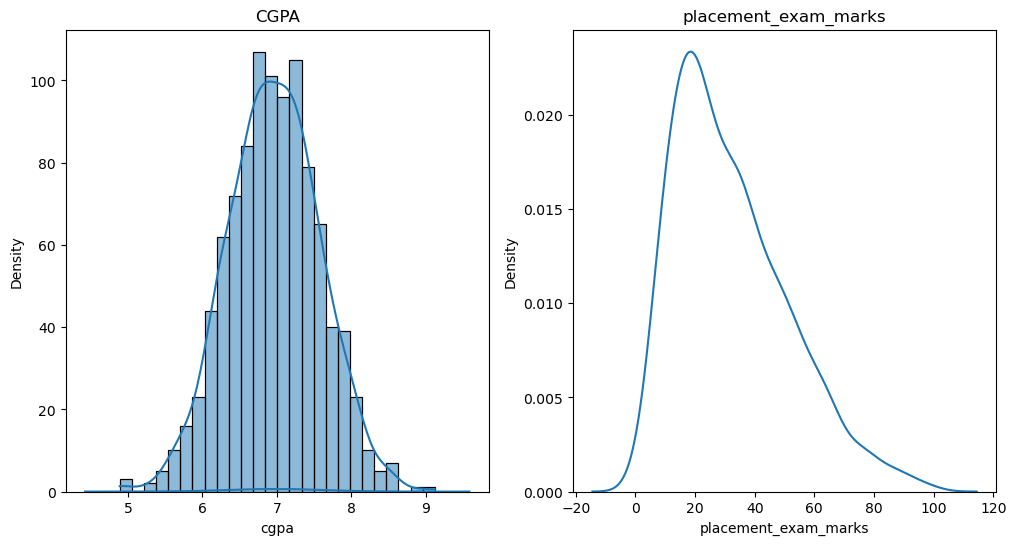

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df["cgpa"],kde=True)
plt.title("CGPA")
plt.subplot(1,2,2)
sns.kdeplot(df["placement_exam_marks"])
plt.title("placement_exam_marks")
plt.show()

In [10]:
df["cgpa"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [12]:
# finding boundary
print("Highest",df["cgpa"].mean()+(3*df["cgpa"].std()))
print("lowest",df["cgpa"].mean()-(3*df["cgpa"].std()))

Highest 8.808933625397168
lowest 5.113546374602832


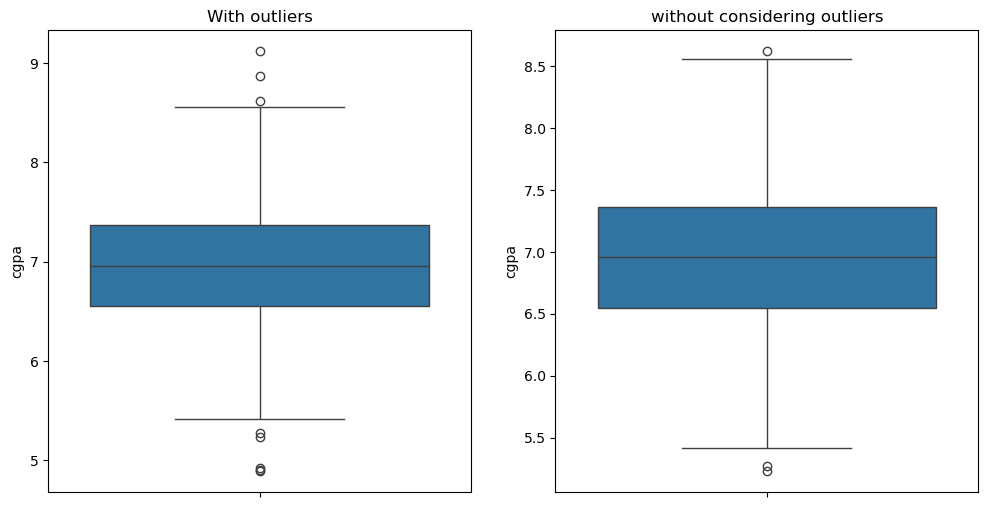

In [23]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df["cgpa"])
plt.title("With outliers")
plt.subplot(1,2,2)
sns.boxplot(df[(df["cgpa"]< 8.80) & (df["cgpa"]>5.11)]["cgpa"])
plt.title("without considering outliers")
plt.show()

In [24]:
# outliers data 
df[(df["cgpa"]>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [25]:
# trimmig
new_df=df[(df["cgpa"]<8.80)&(df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [26]:
# capping
df['cgpa']=np.where(
    df['cgpa']>8.80,
    8.80,
    np.where(
        df['cgpa']<5.11,
        5.11,
        df['cgpa']
    )
)

In [27]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961470,32.225000,0.489000
std,0.612667,19.130822,0.500129
min,5.110000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.800000,100.000000,1.000000


In [28]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000
